In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pywt as pw
import scipy.fftpack as fp
import scipy.linalg as la        
from scipy import misc

## Projections for Large Scale Data
---

### Structurally Random Matrices

In [118]:
class SRM:
    def __init__(self,m,n,blksize):
        self.n = n
        self.m = m
        self.blksize = blksize
        self.random_perm = np.random.permutation(n)
        self.select_vect = np.random.permutation(n)[:m]
        self.D = fp.dct(np.eye(blksize),norm='ortho',type=3)
        self.blkshape = (blksize,n/blksize)
        
    def forward(self,x):
        y = np.asarray(x)
        y = y[self.random_perm]
        y = np.reshape(y,self.blkshape)
        y = np.dot(self.D,y)
        y = np.reshape(y,(self.n,1))
        y = y[self.select_vect]
        return y
    
    def transpose(self,y):
        x = np.zeros((self.n,1))
        x[self.select_vect] = y
        x = np.reshape(x,self.blkshape)
        x = np.dot(self.D.T,x);
        x = np.reshape(x,(self.n,1))
        x = x[np.argsort(self.random_perm)]
        
        return x

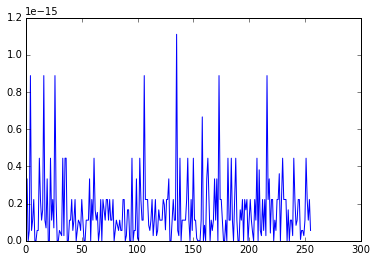

In [119]:
x = np.random.randn(1024,1)
F = SRM(256,1024,32)
y = F.forward(x)
xt = F.transpose(y)
yt = F.forward(xt)

plt.plot(abs(y-yt));

In [120]:
im = misc.lena().astype(np.float32)

N = np.size(im)
M = int(round(0.8*N))
imshape = np.shape(im)

F = SRM(M,N,32)
x = np.reshape(im,(N,1))
y = F.forward(x)
xt = F.transpose(y)
imt = np.reshape(xt,imshape)

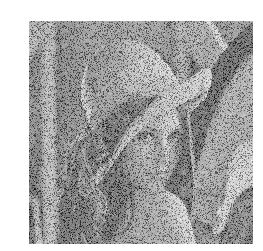

In [121]:
plt.matshow(imt)
plt.gray()
plt.axis("off");